In [27]:
# Import the libraries we will use
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from fbprophet import Prophet
from datetime import datetime
from datetime import timedelta


# Set the plot style and size for embedded plots
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# Set a float format as we'll always be looking at USD monetary values
pd.options.display.float_format = '${:,.2f}'.format

Populating the interactive namespace from numpy and matplotlib


/Users/ajmlaird/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [30]:
# Read in hourly bitcoin price from conbase - price data provided via http://bitcoinity.org
df = pd.read_csv('http://data.bitcoinity.org/export_data.csv?currency=USD&data_type=price&exchange=coinbase&r=hour&t=l&timespan=30d', parse_dates=['Time'])

# Set the date/time to be the index for the dataframe
df.set_index('Time', inplace=True)
df.head()

,avg,max,min
Time,,,
2021-12-12 10:00:00+00:00,"$48,847.70","$48,981.31","$48,665.43"
2021-12-12 11:00:00+00:00,"$49,102.63","$49,332.28","$48,872.19"
2021-12-12 12:00:00+00:00,"$49,450.00","$49,666.76","$49,136.66"
2021-12-12 13:00:00+00:00,"$49,699.68","$49,925.62","$49,534.71"
2021-12-12 14:00:00+00:00,"$49,803.63","$49,960.00","$49,549.19"


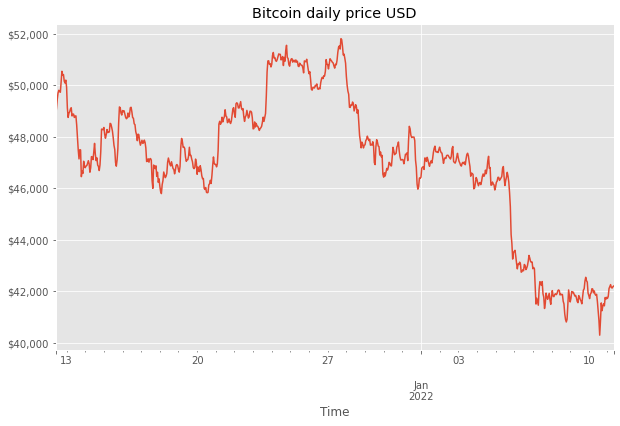

In [44]:
# Plot the hourly prices

ax = df['avg'].plot(title="Bitcoin daily price USD")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

In [45]:
# For forecasting, Prophet requires a dataframe with two columns:
# 'ds' for the date/time
# 'y' for the value to forecast

df['ds'] = df.index
df['y'] = df['avg']

forecast_data = df[['ds', 'y']].copy()
forecast_data.reset_index(inplace=True)
del forecast_data['Time']
forecast_data.head()

,ds,y
0,2021-12-12 10:00:00+00:00,"$48,847.70"
1,2021-12-12 11:00:00+00:00,"$49,102.63"
2,2021-12-12 12:00:00+00:00,"$49,450.00"
3,2021-12-12 13:00:00+00:00,"$49,699.68"
4,2021-12-12 14:00:00+00:00,"$49,803.63"


In [49]:
# Create the Prophet model and fit the data

m = Prophet()
m.fit(forecast_data);

future = m.make_future_dataframe(periods=96, freq='H')
future.tail()

forecast = m.predict(future)
forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail()

ValueError: Column ds has timezone specified, which is not supported. Remove timezone.

In [47]:
# Plot the forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Price (USD)');
plt.title('Bitcoin price forecast (USD)')
fig.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

NameError: name 'forecast' is not defined